In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import random
import shutil

In [2]:
data_dir = 'C:/Users/oleev/Desktop/PORTFOLIO/f1/flowers'
train_dir = 'C:/Users/oleev/Desktop/PORTFOLIO/f1/train'
test_dir = 'C:/Users/oleev/Desktop/PORTFOLIO/f1/test'

In [3]:
train_ratio = 0.8

In [4]:
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    os.mkdir(os.path.join(train_dir, 'daisy'))
    os.mkdir(os.path.join(train_dir, 'dandelion'))
    os.mkdir(os.path.join(train_dir, 'rose'))
    os.mkdir(os.path.join(train_dir, 'sunflower'))
    os.mkdir(os.path.join(train_dir, 'tulip'))

In [5]:
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    os.mkdir(os.path.join(test_dir, 'daisy'))
    os.mkdir(os.path.join(test_dir, 'dandelion'))
    os.mkdir(os.path.join(test_dir, 'rose'))
    os.mkdir(os.path.join(test_dir, 'sunflower'))
    os.mkdir(os.path.join(test_dir, 'tulip'))

In [6]:
for flower in os.listdir(data_dir):
    flower_dir = os.path.join(data_dir, flower)
    images = os.listdir(flower_dir)
    random.shuffle(images)
    train_images = images[:int(train_ratio * len(images))]
    test_images = images[int(train_ratio * len(images)):]
    
    for image in train_images:
        src = os.path.join(flower_dir, image)
        dst = os.path.join(train_dir, flower, image)
        shutil.copyfile(src, dst)

    for image in test_images:
        src = os.path.join(flower_dir, image)
        dst = os.path.join(test_dir, flower, image)
        shutil.copyfile(src, dst)

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 4291 images belonging to 5 classes.
Found 2125 images belonging to 5 classes.


In [9]:
model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [10]:
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [11]:
for layer in model_resnet.layers:
    layer.trainable = False

In [12]:
folders = glob('C:/Users/oleev/Desktop/PORTFOLIO/f1/train/*')

In [13]:
folders

['C:/Users/oleev/Desktop/PORTFOLIO/f1/train\\daisy',
 'C:/Users/oleev/Desktop/PORTFOLIO/f1/train\\dandelion',
 'C:/Users/oleev/Desktop/PORTFOLIO/f1/train\\rose',
 'C:/Users/oleev/Desktop/PORTFOLIO/f1/train\\sunflower',
 'C:/Users/oleev/Desktop/PORTFOLIO/f1/train\\tulip']

In [14]:
x = Flatten()(model_resnet.output)

In [15]:
out_res = Dense(len(folders), activation='softmax')(x)
new_model = Model(inputs=model_resnet.input, outputs=out_res)

In [16]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [17]:
new_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
r = new_model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=5,
  steps_per_epoch=len( train_generator),
  validation_steps=len(test_generator)
)

C:\Users\oleev\AppData\Local\Temp/ipykernel_18232/3722362383.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = new_model.fit_generator(


Epoch 1/5
135/135 [==============================] - 949s 7s/step - loss: 2.3634 - accuracy: 0.3554 - val_loss: 1.4975 - val_accuracy: 0.4631
Epoch 2/5
135/135 [==============================] - 950s 7s/step - loss: 1.8741 - accuracy: 0.4118 - val_loss: 1.5470 - val_accuracy: 0.4748
Epoch 3/5
135/135 [==============================] - 1127s 8s/step - loss: 1.2976 - accuracy: 0.5255 - val_loss: 1.3072 - val_accuracy: 0.5191
Epoch 4/5
135/135 [==============================] - 1599s 12s/step - loss: 1.3994 - accuracy: 0.5262 - val_loss: 1.2633 - val_accuracy: 0.5831
Epoch 5/5
135/135 [==============================] - 1997s 15s/step - loss: 1.1693 - accuracy: 0.5880 - val_loss: 1.0662 - val_accuracy: 0.6240


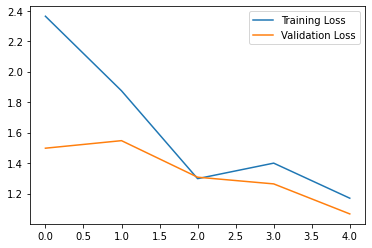

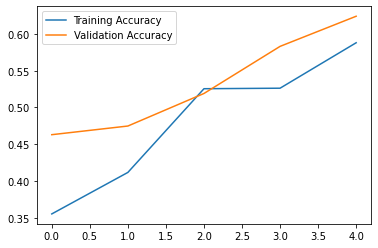

In [20]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [22]:
from tensorflow.keras.models import load_model

new_model.save('model_resnet50.h5')

In [25]:
y_pred = new_model.predict(test_generator)

67/67 [==============================] - 700s 10s/step


In [26]:
y_pred

array([[1.18305953e-02, 1.36081621e-01, 3.43099177e-01, 4.19227891e-02,
        4.67065841e-01],
       [5.21540502e-03, 6.18589163e-01, 2.93220282e-01, 5.37668504e-02,
        2.92083118e-02],
       [6.63923041e-04, 8.92348170e-01, 8.92981142e-02, 1.55136744e-02,
        2.17611459e-03],
       ...,
       [3.21054785e-03, 5.98617829e-02, 8.70909095e-02, 2.66907038e-03,
        8.47167730e-01],
       [3.34257056e-04, 1.86114479e-02, 4.65566069e-02, 9.07021880e-01,
        2.74758916e-02],
       [3.74111487e-03, 1.04321666e-01, 6.66971028e-01, 1.02991603e-01,
        1.21974617e-01]], dtype=float32)

In [27]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 1, 1, ..., 4, 3, 2], dtype=int64)

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_resnet50.h5')

In [33]:
img=image.load_img('C:/Users/oleev/Desktop/PORTFOLIO/f1/test/daisy/5794835_d15905c7c8_n.jpg',target_size=(224,224))

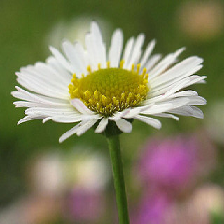

In [34]:
img

In [35]:
x=image.img_to_array(img)
x

array([[[ 74.,  88.,  37.],
        [ 74.,  88.,  37.],
        [ 75.,  89.,  38.],
        ...,
        [ 78.,  89.,  46.],
        [ 77.,  90.,  46.],
        [ 73.,  86.,  42.]],

       [[ 76.,  90.,  39.],
        [ 75.,  89.,  36.],
        [ 75.,  89.,  36.],
        ...,
        [ 81.,  90.,  47.],
        [ 80.,  91.,  48.],
        [ 76.,  87.,  44.]],

       [[ 77.,  91.,  38.],
        [ 76.,  91.,  36.],
        [ 76.,  91.,  36.],
        ...,
        [ 83.,  92.,  49.],
        [ 83.,  92.,  49.],
        [ 80.,  89.,  46.]],

       ...,

       [[135., 128., 118.],
        [139., 133., 121.],
        [141., 135., 123.],
        ...,
        [ 75.,  92.,  47.],
        [ 77.,  90.,  47.],
        [ 77.,  92.,  49.]],

       [[138., 129., 120.],
        [142., 133., 124.],
        [145., 136., 127.],
        ...,
        [ 73.,  92.,  47.],
        [ 77.,  90.,  47.],
        [ 75.,  90.,  49.]],

       [[143., 132., 126.],
        [143., 134., 125.],
        [144., 1

In [36]:
x=x/255

In [37]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[9.9786794e-01, 1.2838331e-04, 2.1474552e-05, 1.7219008e-03,
        2.6024051e-04]], dtype=float32)

In [39]:
Index=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 254ms/step


In [40]:
Index

array([0], dtype=int64)